In [ ]:
from sklearn import datasets, preprocessing, linear_model, decomposition, model_selection
import time

Comparing score, time taken in Logistic Regression, with & without PCA

In [ ]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y= cancer.target
x.shape
# So, there are 30 features with us

(569, 30)

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, random_state= 0)

In [ ]:
# For  PCA we haven't normaliazed any feature. We'll scale with the help of only training data, not testing data
scaler = preprocessing.StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

pca = decomposition.PCA( n_components = 15)
xtrain_pca = pca.fit_transform(xtrain_scaled)
xtest_pca = pca.transform(xtest_scaled)    # We'll only transform xtest using created PCA and not fit_transform it

lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(xtrain_pca, ytrain)
end = time.time()
print( "Time to run model with pca is " , end- start  )
print( "Test Score with PCA in logistic R is"  ,lr.score(xtest_pca, ytest))
print()

lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(xtrain, ytrain)
end = time.time()
print( "Time to run model without pca is " , end- start  )
print( "Test Score without PCA in logistic R is"   , lr.score(xtest, ytest))
print()
pca.explained_variance_

Time to run model with pca is  0.020711421966552734
Test Score with PCA in logistic R is 0.958041958041958

Time to run model without pca is  0.10880780220031738
Test Score without PCA in logistic R is 0.9440559440559441



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([13.0251132 ,  5.88977769,  2.87793898,  2.00948748,  1.71733052,
        1.20937017,  0.65451203,  0.44804613,  0.42415053,  0.35376992,
        0.31413668,  0.26849195,  0.236184  ,  0.1508295 ,  0.09421796])

In [ ]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(type(oliv))
print(oliv.data.shape)
print(oliv.target.shape)
print(oliv.images.shape)
print(type(oliv.target))
oliv

<class 'sklearn.utils._bunch.Bunch'>
(400, 4096)
(400,)
(400, 64, 64)
<class 'numpy.ndarray'>


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

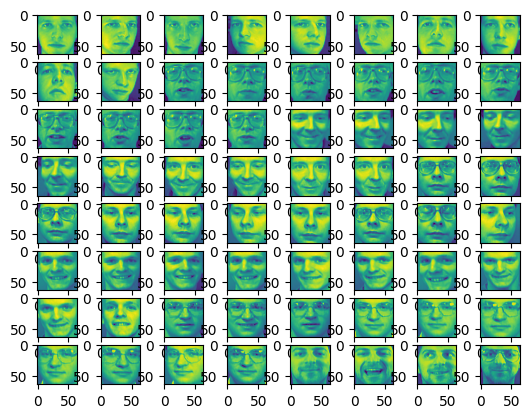

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
for i in range(64):
  ax= figure.add_subplot(8,8,i+1)
  ax.imshow(oliv.images[i])
plt.show()

In [ ]:
from sklearn.decomposition import PCA

data  = oliv.data
data.shape

(400, 4096)

In [ ]:
pca = PCA()
pca.fit(data)
final_var = 0.99

total_var = sum(pca.explained_variance_)
while final_var > 0.70:
  current_var = 0
  k= 0
  while current_var/total_var < final_var:
    current_var += pca.explained_variance_[k]
    k += 1
  print("Total no. of new features for variance = " , round(final_var, 2),  " are " , k)
  final_var -= 0.05

Total no. of new features for variance =  0.99  are  260
Total no. of new features for variance =  0.94  are  107
Total no. of new features for variance =  0.89  are  60
Total no. of new features for variance =  0.84  are  37
Total no. of new features for variance =  0.79  are  25
Total no. of new features for variance =  0.74  are  17


Creating an image

(1, 2, 2)


TypeError: Invalid shape (1, 2, 2) for image data

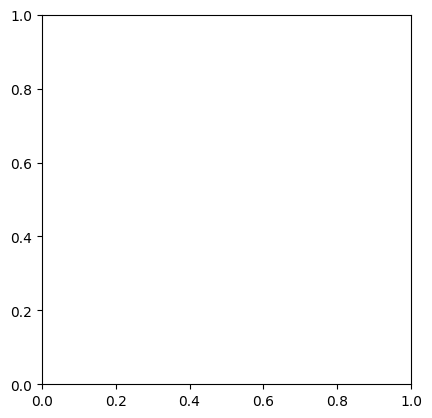

In [ ]:
import numpy as np
image_shape = (1,2,2)
image = np.array([[[1,1] , [1,2]] ])
print(image.shape)

figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.imshow(image)
plt.show()